In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
# import warnings
# warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# linear regression algorithms
from sklearn.linear_model import LinearRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to see local file system
import os

# import our own modules
import env
import acquire as a

# jupyter settings
%matplotlib inline

In [2]:
z17 = a.get_zillow_data2017()

In [3]:
z17.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
# I want to go ahead and standardize column names to something more pythonic
z17 = z17.rename(columns = {'bedroomcnt' : 'bedrooms', 
                            'bathroomcnt' : 'bathrooms', 
                           'calculatedfinishedsquarefeet' : 'area', 
                           'taxvaluedollarcnt' : 'tax_value', 
                           'yearbuilt' : 'year_built', 
                           'taxamount' : 'tax_amount'})

In [5]:
z17.info(show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2152852 non-null  float64
 1   bathrooms   2152852 non-null  float64
 2   area        2144379 non-null  float64
 3   tax_value   2152370 non-null  float64
 4   year_built  2143526 non-null  float64
 5   tax_amount  2148421 non-null  float64
 6   fips        2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [6]:
# There are no null values in fips
# yearbuilt has the most null values at .43%
# even if the nulls are all allocated to different properties,
# we would lose only about 1% of the dataset. As far as building
# a price predictive model, it would seem that just dropping 
# all of the rows with a null value makes the most sense.

z17.isna().sum()[z17.isna().sum() > 0] / len(z17)

bedrooms      0.000005
bathrooms     0.000005
area          0.003941
tax_value     0.000229
year_built    0.004337
tax_amount    0.002063
dtype: float64

In [7]:
z17.shape

(2152863, 7)

In [8]:
z17.describe()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [9]:
z17.fips.value_counts()

6037.0    1431811
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [10]:
# fips appear to be the ANSI location code.
# The three values here appear to refer to 6037 Los Angeles Country, 
# 6059 Orange County, 6111 Ventura County

In [11]:
z17 = z17.dropna()

In [12]:
# nulls gone
z17.isna().sum()[z17.isna().sum() > 0]

Series([], dtype: int64)

In [13]:
z17.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [14]:
z17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.6 MB


In [15]:
# may as well reset the index after dropping nulls
z17.reset_index(drop=True, inplace=True)
z17.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [16]:
# now to consider datatypes: All features are currently floats
# usually bedrooms are whole numbers, also year built, and fips code could be integers
z17.bedrooms.value_counts()

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedrooms, dtype: int64

In [17]:
# assumption of whole numbers checks out for bedrooms
z17.bedrooms = z17.bedrooms.astype(int)
z17.dtypes

bedrooms        int64
bathrooms     float64
area          float64
tax_value     float64
year_built    float64
tax_amount    float64
fips          float64
dtype: object

In [65]:
z17.year_built = z17.year_built.astype(int)
z17.fips = z17.fips.astype(object)


In [19]:
z17.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633.0,296425.0,2005,6941.39,6037
1,3,4.0,1620.0,847770.0,2011,10244.94,6037
2,3,2.0,2077.0,646760.0,1926,7924.68,6037
3,0,0.0,1200.0,5328.0,1972,91.60,6037
4,0,0.0,171.0,6920.0,1973,255.17,6037


In [66]:
z17.dtypes

bedrooms        int64
bathrooms     float64
area          float64
tax_value     float64
year_built      int64
tax_amount    float64
fips           object
dtype: object

In [21]:
# a consolidated cleaning function:
def clean_zillow2017():
    '''
    This function retrieves the zillow data from the CodeUp MySQL database
    and applies cleaning steps to drop observations with null values,
    reset the index after dropping rows, and cast bedroomcnt, yearbuilt, 
    and fips to integers. It returns the wrangled dataframe. Function relies
    on other functions in the wrangle.py module.
    '''
    df = get_zillow_data2017()
    # dropping all nulls as they are less than 1% of observations
    # and scattered across the features.
    df = df.dropna()
    # may as well reset the index after dropping nulls
    df.reset_index(drop=True, inplace=True)
    # bedrooms, year built, and fips code should be integers
    df.bedrooms = df.bedrooms.astype(int)
    df.year_built = df.year_built.astype(int)
    df.fips = df.fips.astype(int)
    df = df[df.area < 200_000]
    
    return df

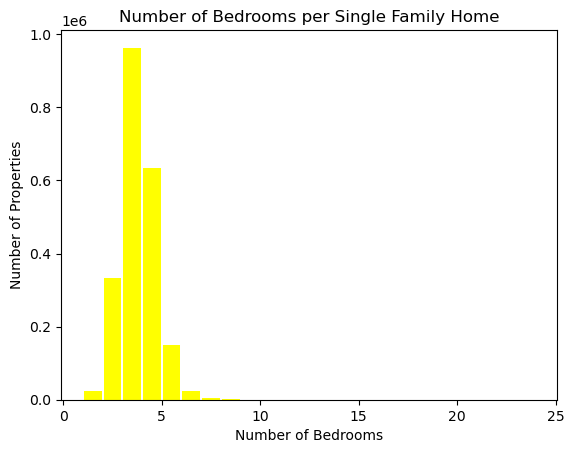

In [22]:
# now some univariate viz:
plt.hist(x='bedrooms', data=z17, bins=range(1,25), rwidth=.9, color='yellow')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bedrooms per Single Family Home')
plt.show()


In [23]:
# distribution of number of bedrooms looks
# roughly normal centered on 3.

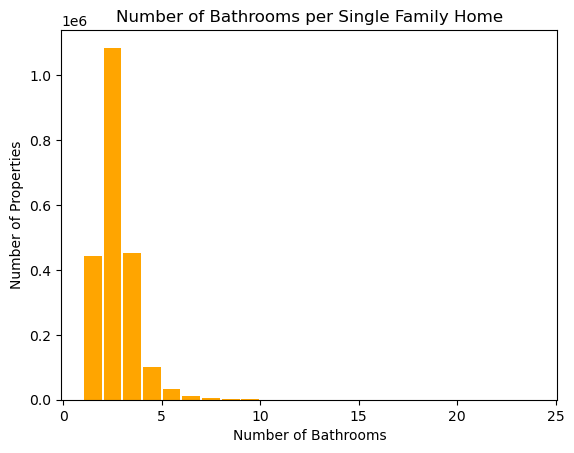

In [24]:
plt.hist(x='bathrooms', data=z17, bins=range(1,25), rwidth=.9, color='orange')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bathrooms per Single Family Home')
plt.show()


In [25]:
# distribution of number of bathrooms is roughly normal centered on 2.

In [26]:
z17.area.max()

952576.0

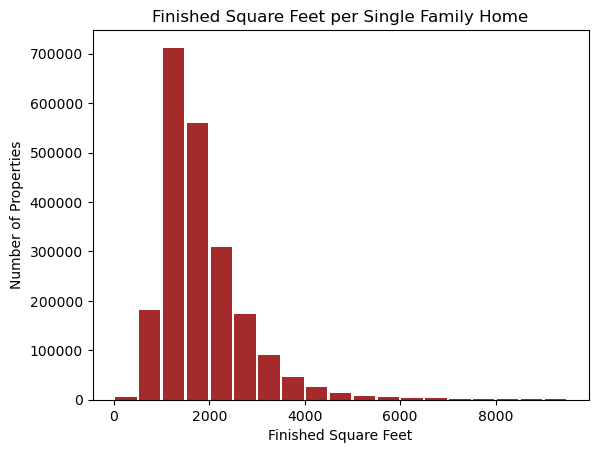

In [27]:

plt.hist(x='area', 
         data=z17, rwidth=.9, bins=range(0,10000,500), color='brown')
plt.xlabel('Finished Square Feet')
plt.ylabel('Number of Properties')
plt.title('Finished Square Feet per Single Family Home')
plt.show()

In [28]:
# distribution of finished square ft approx normal
# centered around 1500

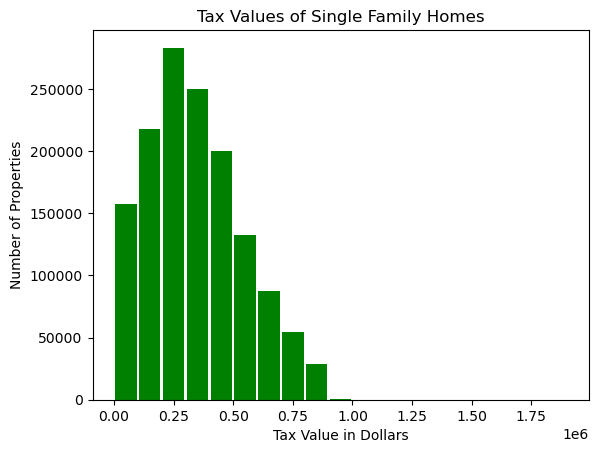

In [69]:
plt.hist(x='tax_value', data=z17, 
         rwidth=.9, bins=range(0,2_000_000,100_000), color='green')
plt.xlabel('Tax Value in Dollars')
plt.ylabel('Number of Properties')
plt.title('Tax Values of Single Family Homes')
plt.show()

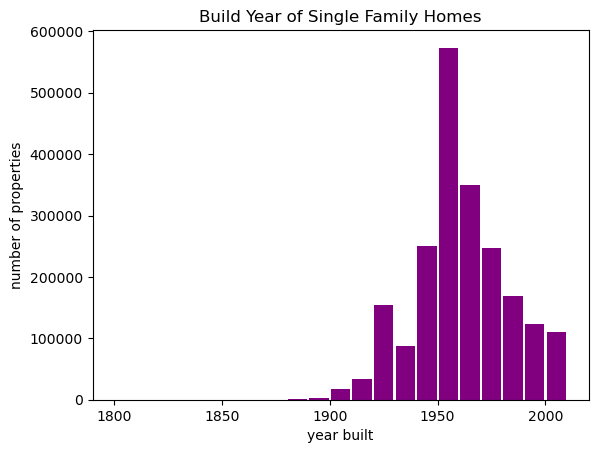

In [30]:
plt.hist(x='year_built', data=z17, rwidth=.9, bins=range(1800,2020,10), color='purple')
plt.xlabel('year built')
plt.ylabel('number of properties')
plt.title('Build Year of Single Family Homes')
plt.show()

In [31]:
# year built is approx normal, centered around 1960.

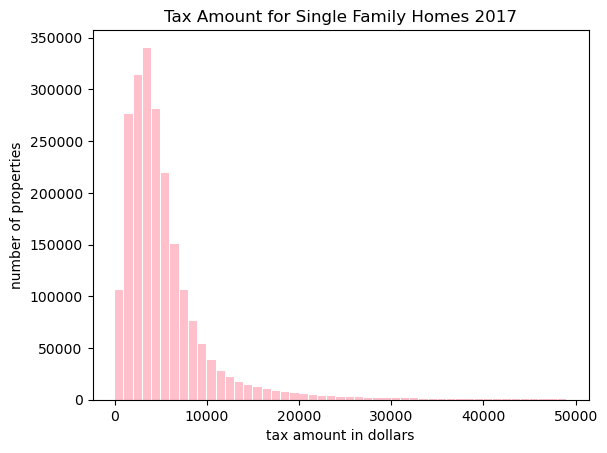

In [32]:
plt.hist(x='tax_amount', data=z17, rwidth=.9, bins=range(0,50_000,1000), color='pink')
plt.xlabel('tax amount in dollars')
plt.ylabel('number of properties')
plt.title('Tax Amount for Single Family Homes 2017')
plt.show()

In [33]:
# distribution of tax amount is relatively normal with a right skew.
# centered at about $4000

In [34]:
z17.fips.value_counts()

6037    1425207
6059     552057
6111     162971
Name: fips, dtype: int64

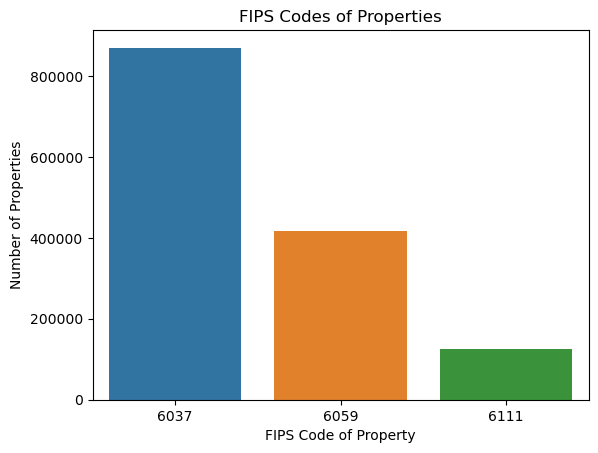

In [67]:
sns.countplot(x='fips', data=z17)
plt.xlabel('FIPS Code of Property')
plt.ylabel('Number of Properties')
plt.title('FIPS Codes of Properties')
plt.show()

In [36]:
# FIPS codes represent counties: 6037=Los Angeles County 66.6%
# 6059=Orange County 25.8%, # 6111=Ventura County 7.6%
z17.fips.value_counts(normalize=True)

6037    0.665911
6059    0.257942
6111    0.076146
Name: fips, dtype: float64

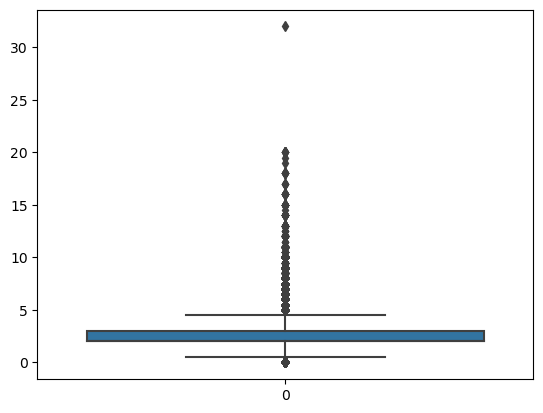

In [37]:
sns.boxplot(data=z17.bathrooms)
plt.show()

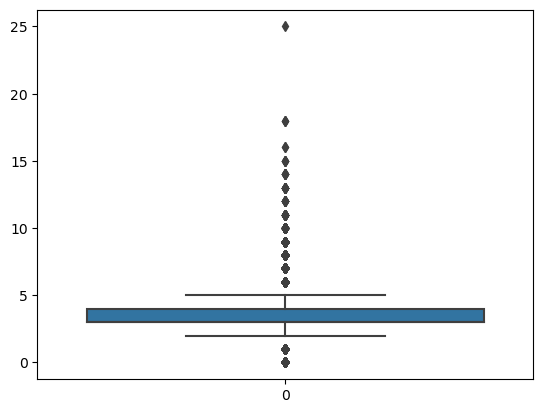

In [38]:
sns.boxplot(data=z17.bedrooms)
plt.show()

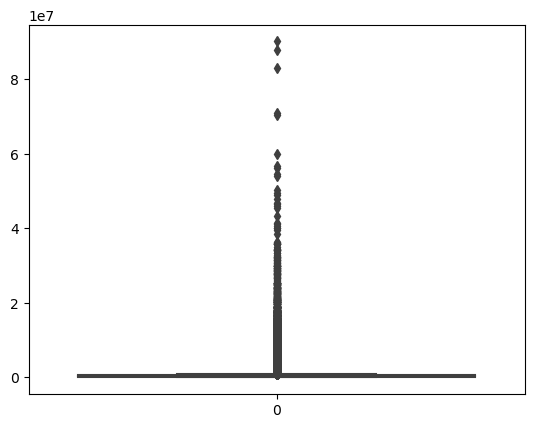

In [39]:
sns.boxplot(data=z17.tax_value)
plt.show()

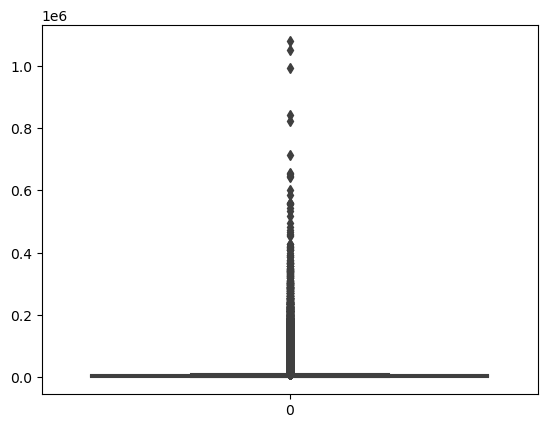

In [40]:
sns.boxplot(data=z17.tax_amount)
plt.show()

In [41]:
z17.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

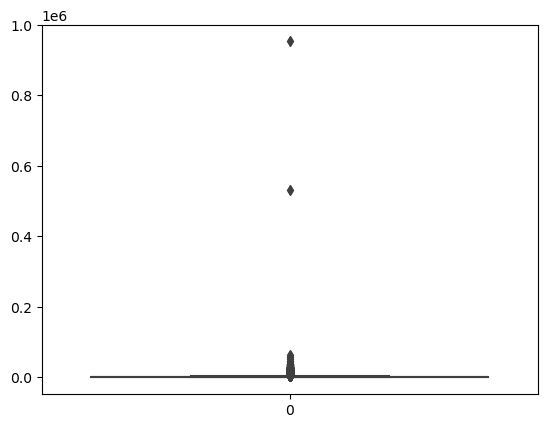

In [42]:
sns.boxplot(data=z17.area)
plt.show()

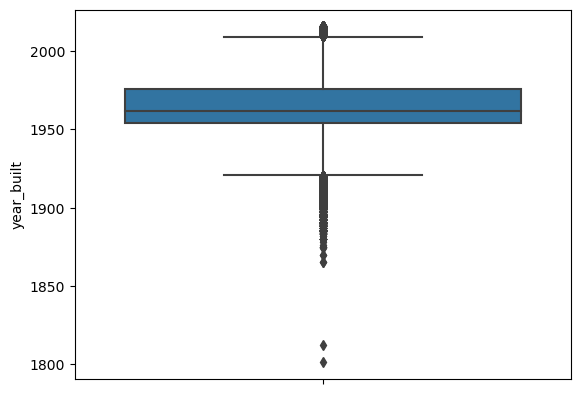

In [53]:
sns.boxplot(y='year_built', data=z17)
plt.show()

### Outliers:
##### Most useful for our model if we cut off all outliers since we're focused on building a model to predict typical home values. The outliers, especially on the high end will skew the model and realistically they probably need their own models.

In [62]:
col_list = z17.columns.tolist()
col_list.remove('year_built')
col_list.remove('fips')
col_list

['bedrooms', 'bathrooms', 'area', 'tax_value', 'tax_amount']

In [45]:
col_qs = {}
for col in col_list:
    col_qs[col] = z17[col].quantile([0.25, 0.75])
    
col_qs

{'bedrooms': 0.25    3.0
 0.75    4.0
 Name: bedrooms, dtype: float64,
 'bathrooms': 0.25    2.0
 0.75    3.0
 Name: bathrooms, dtype: float64,
 'area': 0.25    1258.0
 0.75    2208.0
 Name: area, dtype: float64,
 'tax_value': 0.25    189166.0
 0.75    534606.0
 Name: tax_value, dtype: float64,
 'tax_amount': 0.25    2540.85
 0.75    6411.93
 Name: tax_amount, dtype: float64}

In [46]:
# There are a fair number of extreme outliers in all features except for fips.
# The ones in year may still be useful as age of houses do not necessarily
# dramatically change their value. Since we are trying to model home prices
# across typical home values, I will drop the outliers except for year. 
#The outliers, especially on the high end will skew the model and 
#realistically they probably need their own models.

def remove_outliers(df, col_list, k=1.5):
    '''
    remove outliers from a dataframe based on a list of columns
    using the tukey method.
    return a single dataframe with outliers removed
    '''
    col_qs = {}
    for col in col_list:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
    for col in col_list:
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (k*iqr)
        upper_fence = col_qs[col][0.75] + (k*iqr)
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [50]:
z17 = remove_outliers(z17, col_list)
z17

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
2,3,2.0,2077.0,646760.0,1926,7924.68,6037
7,3,2.0,1300.0,233266.0,1950,3110.99,6037
8,3,2.0,1222.0,290492.0,1951,3870.25,6037
10,3,2.5,1821.0,537949.0,2013,6173.72,6059
20,2,2.0,1970.0,637686.0,2013,9729.72,6059
...,...,...,...,...,...,...,...
2140225,3,2.5,2033.0,641757.0,2015,10009.46,6059
2140227,3,2.0,1917.0,408680.0,1946,4341.32,6111
2140228,4,2.0,1987.0,259913.0,1955,3175.66,6059
2140229,3,2.5,1809.0,405547.0,2012,4181.10,6059


In [48]:
# now lets revisit the box plots without outliers:

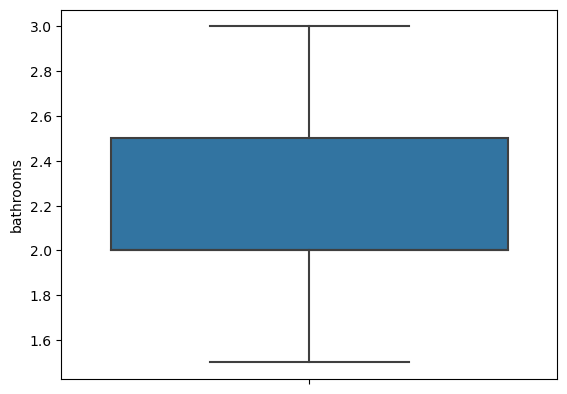

In [56]:
sns.boxplot(y='bathrooms', data=z17)
plt.show()

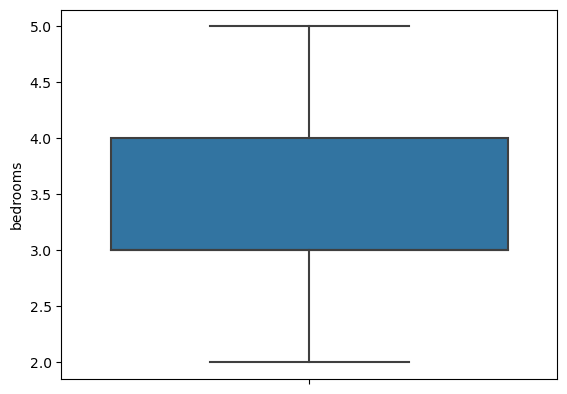

In [55]:
sns.boxplot(y='bedrooms', data=z17)
plt.show()

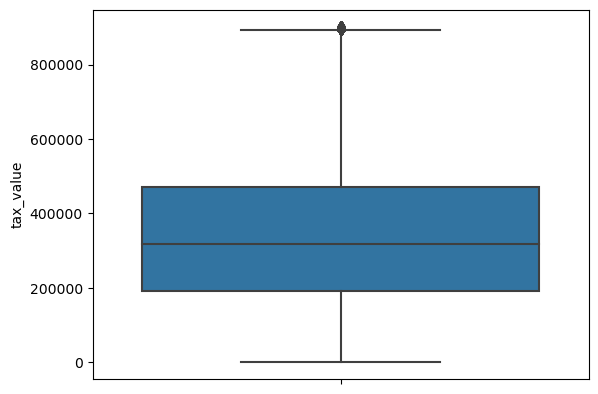

In [57]:
sns.boxplot(y='tax_value', data=z17)
plt.show()

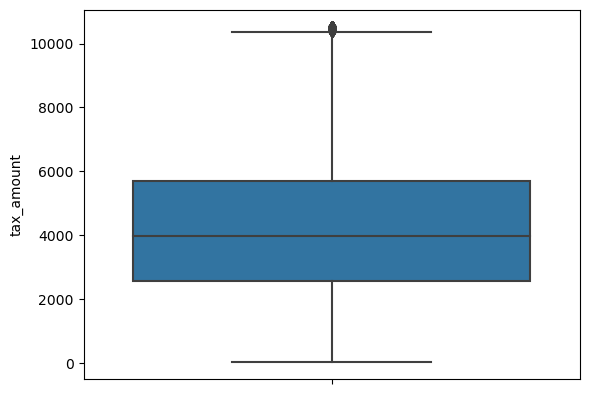

In [58]:
sns.boxplot(y='tax_amount', data=z17)
plt.show()

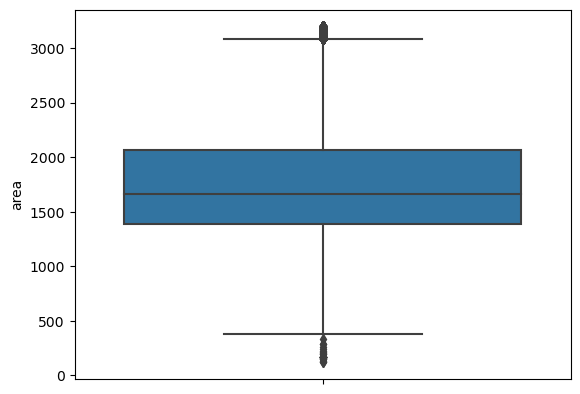

In [60]:
sns.boxplot(y='area', data=z17)
plt.show()

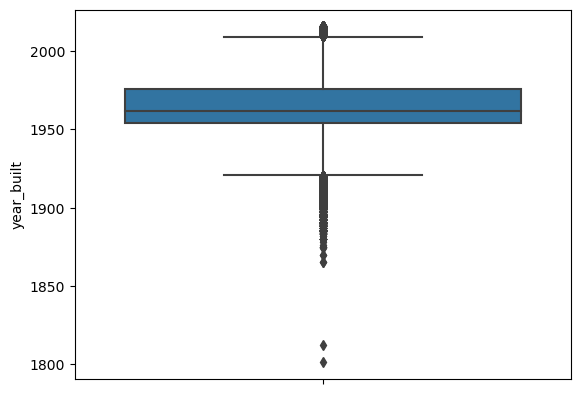

In [61]:
sns.boxplot(y='year_built', data=z17)
plt.show()

In [ ]:
# much more useful looking boxplots now.

In [ ]:
# ok now to build a wrangle function:

def wrangle_zillow():
    '''
    This function retrieves the zillow data from the CodeUp MySQL database
    and applies cleaning steps to drop observations with null values,
    reset the index after dropping rows, and cast bedroomcnt, yearbuilt, 
    and fips to integers. It then splits the dataframe into Train, Validate, 
    and Test dataframes. Function relies
    on other functions in the wrangle.py module.
    
    Arguments: None
    Returns: Train, Validate, Test dataframes
    '''
    split_data(clean_zillow_data2017())
    
    
    return train, validate, test
    
    